In [1]:
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob
import pickle

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
import random 
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Dropout,Flatten,Activation,MaxPool2D,BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.utils import plot_model

In [3]:
CATEGORIES=['Bishop','King','Knight','Pawn','Queen','Rook'] ## define the list of number of classes we are going to use.
DATADIR=r'C:\Users\systems\Downloads\chess\Chessman-image-dataset\Chess' # dataset path 
IMG_SIZE=300  ## mention size of image you wanted

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.3,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                   shear_range=3, 
                                    zoom_range=50,
                                    horizontal_flip=True,
                                   vertical_flip=True)
#used to augment images to increase size of dataset
#for example the images here are rescaled,rotated,flipped and all of these copies are added to the dataset while training 
#Image Data Generator does not return the OG image, only the augmented ones

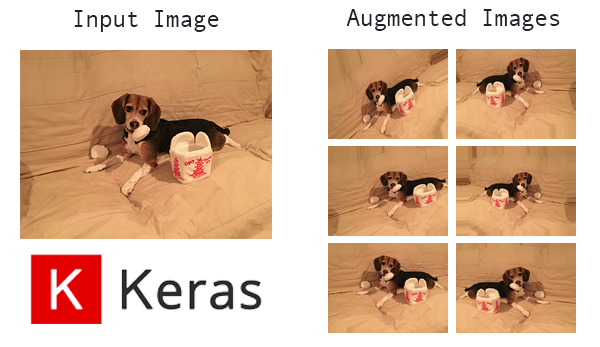

In [5]:
from IPython.display import Image
Image(filename='Augment.png') 

In [6]:
batch_size=32 #number of training examples used in one iteration
IMG_HEIGHT=300 #number of pixels, for example here it's 300 x 300
train_dir=r'C:\Users\systems\Downloads\chess\Chessman-image-dataset\Chess'
os.listdir(train_dir) #listing the folders in the directory

['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [7]:
X_train_datagen=train_datagen.flow_from_directory(batch_size=batch_size,
                                                   directory=train_dir,
                                                   shuffle=False,
                                                   target_size=(IMG_HEIGHT, IMG_HEIGHT),
                                                   subset='training',
                                                   class_mode='categorical',
                                                   color_mode='grayscale',
                                                   seed=42)
#set to grayscale as chess pieces don't have any defining colors
#seed randomly augments the image and shuffles the images
                                                  
validation_generator = train_datagen.flow_from_directory(
                                                        directory=train_dir,
                                                        target_size=(IMG_HEIGHT, IMG_HEIGHT),
                                                        color_mode='grayscale',
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        subset='validation',
                                                        shuffle=False,
                                                        seed=42)
#validation set is a dataset of some images which are not trained, to see the effectiveness of the data
#The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters.
#The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.

Found 389 images belonging to 6 classes.
Found 162 images belonging to 6 classes.


In [8]:
X_train_datagen.samples

389

In [9]:
input_shape=(32, 300, 300, 1) ### here full size for model input  (batch_size,img_Size,img_size,1)
#shape relates to no of processed images and size of the image
#input layer/tensor must have the same parameters as the input images 

# Define simple two layer CNN followed by dense two dense unit

In [10]:
model = Sequential([
    Conv2D(16, (3,3), input_shape=input_shape[1:], padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 180000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               23040128  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [12]:
Early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)#to prevent overffiting of dataset
#it stops the training once the model stops improving
#Patience refers to number of epochs with no improvement after which training will be stopped.

In [13]:
from keras.callbacks import ReduceLROnPlateau ##### To control learning rate
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0005) 
callback = [Early,learning_rate_reduction]
#ReduceLROnPLateau reduces learning rate when the learning stagnates, here learning is reduced by a factor of half(0.5)
#verbose 1 makes it return a message if learning stagnates


In [14]:
#image,label=next(X_train_datagen)
#input_shape=image.shape(32, 300, 300, 1)

In [15]:
history = model.fit_generator(X_train_datagen,
                              validation_data=validation_generator,
                              callbacks = callback, 
                              epochs=50,
                              verbose=1
                             )### fit dataset for just 10 epoch 
#Epochs are number of times the dataset is processed
#Too many epochs causes overfittting or unification
#Too little epochs cause underfitting or undeveloped groups
#here if the learning stagnates at some epoch,the learning rate was reduced by afore mentioned factor
#verbose=1 is specfified because I wanted to see every single epoch

c:\users\systems\pycharmprojects\ml\venv1\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
13/13 [==============================] - 29s 2s/step - loss: 13.5937 - accuracy: 0.1218 - val_loss: 2.0695 - val_accuracy: 0.1852
Epoch 2/50
13/13 [==============================] - 26s 2s/step - loss: 2.5438 - accuracy: 0.0887 - val_loss: 1.8052 - val_accuracy: 0.1914
Epoch 3/50
13/13 [==============================] - 27s 2s/step - loss: 1.7626 - accuracy: 0.1726 - val_loss: 1.7935 - val_accuracy: 0.1728
Epoch 4/50
13/13 [==============================] - 27s 2s/step - loss: 1.8311 - accuracy: 0.1165 - val_loss: 1.7874 - val_accuracy: 0.1914

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/50
13/13 [==============================] - 27s 2s/step - loss: 1.7869 - accuracy: 0.1252 - val_loss: 1.7846 - val_accuracy: 0.1543
Epoch 6/50
13/13 [==============================] - 27s 2s/step - loss: 1.7849 - accuracy: 0.1379 - val_loss: 1.7854 - val_accuracy: 0.1667
Epoch 7/50
13/13 [==============================] - 27s 2s/step - loss: 1.8085

In [16]:
#history1=model.fit(X_train_datagen,batch_size=32, epochs=10, verbose=1, validation_data=(validation_generator),callbacks=[callback])

# Visualising the training

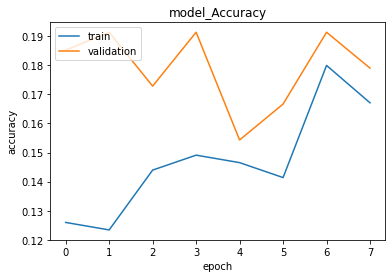

In [17]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')

In [18]:
##### just and image plotting function
def img_plot(x):
    ndarray=prepare(x)
    plt.plot(ndarray)
    plt.show()


# Testing the model

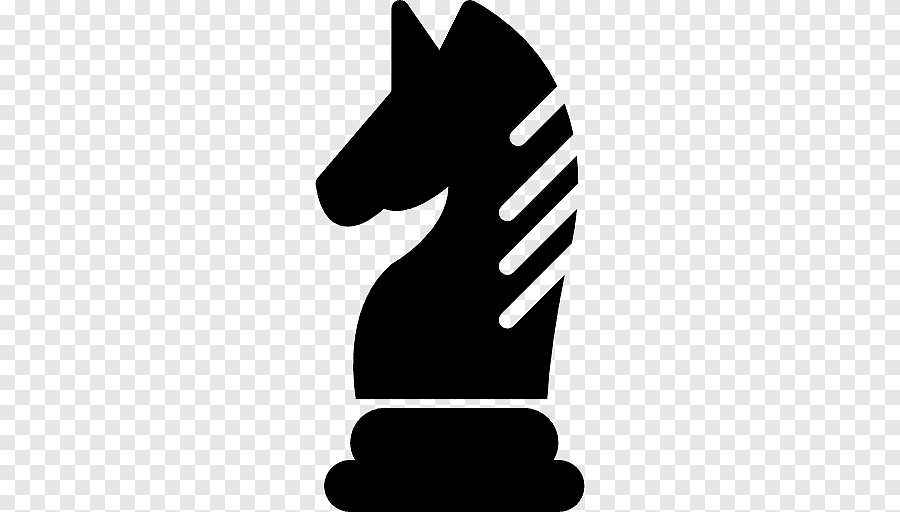

In [19]:
Image(filename='Test2.png') 

This is the test image

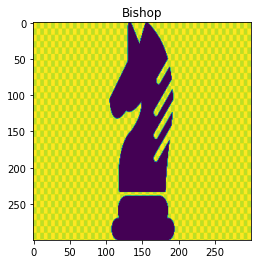

In [20]:
def prepare(file):
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_HEIGHT, IMG_HEIGHT))
    plt.imshow(new_array)
    return new_array.reshape(-1, IMG_HEIGHT, IMG_HEIGHT, 1)
#image = testX[1]#your image path
image='Test2.png'
#img_plot(image)
prediction = model.predict([prepare(image)])

prediction = list(prediction)
#print(CATEGORIES[prediction.index(max(prediction))])
temp=CATEGORIES[prediction.index(max(prediction))]
plt.title(temp)
plt.show()

#prepare function takes an input image, converts it to grayscale and resizes it into 300 x 300, as we've defined elsewhere
#this image is then passed to the model
#the first output of the model is printed